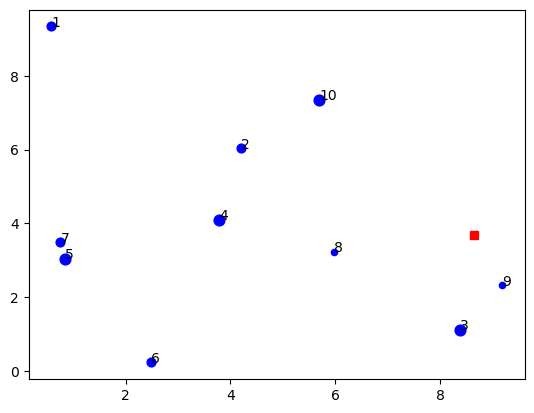

3
Generation 0: Best Fitness = 47.75421189113319
Generation 10: Best Fitness = 47.07741532506792
Generation 20: Best Fitness = 42.46467388824151
Generation 30: Best Fitness = 42.46467388824151
Generation 40: Best Fitness = 42.46467388824151
Generation 50: Best Fitness = 42.416466223088364
Generation 60: Best Fitness = 42.416466223088364
Generation 70: Best Fitness = 42.416466223088364
Generation 80: Best Fitness = 41.684305115146394
Generation 90: Best Fitness = 41.684305115146394
Generation 100: Best Fitness = 41.684305115146394
Generation 110: Best Fitness = 41.684305115146394
Generation 120: Best Fitness = 41.684305115146394
Generation 130: Best Fitness = 41.684305115146394
Generation 140: Best Fitness = 41.684305115146394
Generation 150: Best Fitness = 41.684305115146394
Generation 160: Best Fitness = 41.684305115146394
Generation 170: Best Fitness = 41.684305115146394
Generation 180: Best Fitness = 41.684305115146394
Generation 190: Best Fitness = 41.684305115146394
Generation 200

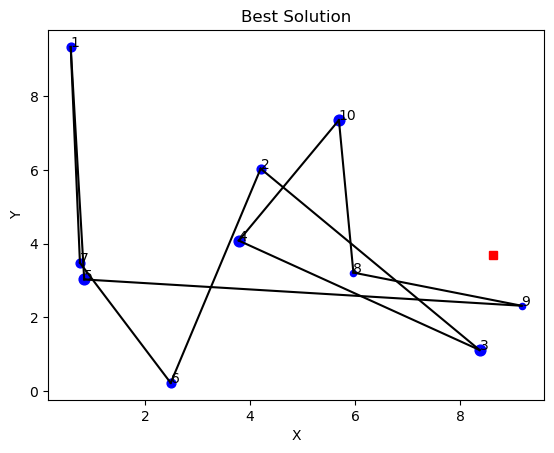

In [41]:
import random
import networkx as nx
import numpy as np
import math
import matplotlib.pyplot as plt

N = 10  # performance of algorithm
V = set(range(N + 1))
location = [(np.random.uniform(0, 10), np.random.uniform(0, 10))]
plt.plot(location[-1][0], location[-1][1], 'rs')

d = [0]
for i in V - {0}:
    location.append((np.random.uniform(0, 10), np.random.uniform(0, 10)))
    d.append(random.randint(1, 3))
    plt.scatter(location[-1][0], location[-1][1], d[-1] * 20, 'b')
    plt.text(location[-1][0], location[-1][1], i)

plt.show()


def distance(a, b):
    return math.sqrt((a[0] - b[0]) * (a[0] - b[0]) + (a[0] - b[0]) * (a[0] - b[0]))


c = [[0 if i == j else distance(location[i], location[j]) for j in V] for i in V]

Capacity = 8  # capacity of truck
M = math.ceil(sum(d) / Capacity)

print(M)  # illustration of the problem


def create_individual():
    """
    Create a random individual for the genetic algorithm.
    Each individual represents a possible solution - a permutation of the points to visit.
    """
    individual = list(V - {0})
    random.shuffle(individual)
    return individual


def evaluate_fitness(individual):
    """
    Evaluate the fitness value of an individual.
    The fitness value is the total distance traveled by all trucks to visit all points.
    """
    fitness = 0
    truck_capacity = Capacity
    truck_location = location[0]
    for point in individual:
        point_location = location[point]
        fitness += distance(truck_location, point_location)
        truck_location = point_location
        truck_capacity -= d[point]
        if truck_capacity < 0:
            fitness += distance(truck_location, location[0])
            truck_location = location[0]
            truck_capacity = Capacity
    fitness += distance(truck_location, location[0])  # Return to depot
    return fitness


def crossover(parent1, parent2):
    """
    Perform crossover between two parents to produce offspring.
    Ordered crossover (OX) is used to preserve the relative order of points.
    """
    length = len(parent1)
    start = random.randint(0, length - 1)
    end = random.randint(start + 1, length)
    offspring = [-1] * length

    # Copy the segment between start and end from parent 1 to the offspring
    offspring[start:end] = parent1[start:end]

    # Fill in the remaining positions with the genes from parent 2
    pointer = end
    for gene in parent2[end:] + parent2[:end]:
        if gene not in offspring:
            offspring[pointer % length] = gene
            pointer = (pointer + 1) % length

    return offspring


def mutate(individual, mutation_rate):
    """
    Perform mutation on an individual.
    Swap mutation is used to swap two points in the individual.
    """
    if random.random() < mutation_rate:
        index1, index2 = random.sample(range(len(individual)), 2)
        individual[index1], individual[index2] = individual[index2], individual[index1]
    return individual


def genetic_algorithm(population_size, generations, crossover_rate, mutation_rate):
    """
    Perform the genetic algorithm to find the optimal solution.
    """
    population = [create_individual() for _ in range(population_size)]
    best_fitness = float('inf')
    best_individual = None

    for generation in range(generations):
        offspring = []
        for _ in range(population_size // 2):
            parent1, parent2 = random.choices(population, k=2)
            if random.random() < crossover_rate:
                child1 = crossover(parent1, parent2)
                child2 = crossover(parent2, parent1)
                offspring.extend([child1, child2])
            else:
                offspring.extend([parent1, parent2])

        population = offspring
        for individual in population:
            individual = mutate(individual, mutation_rate)
            fitness = evaluate_fitness(individual)
            if fitness < best_fitness:
                best_fitness = fitness
                best_individual = individual

        if generation % 10 == 0:
            print(f"Generation {generation}: Best Fitness = {best_fitness}")

    return best_individual, best_fitness


# Parameters for the genetic algorithm
population_size = 100
generations = 500
crossover_rate = 0.8
mutation_rate = 0.2

best_individual, best_fitness = genetic_algorithm(population_size, generations, crossover_rate, mutation_rate)
print("Best Individual:", best_individual)
print("Best Fitness:", best_fitness)

def plot_best_solution(solution):
    plt.figure()
    plt.plot(location[0][0], location[0][1], 'rs')
    for i in range(len(solution)):
        x_values = [location[solution[i - 1]][0], location[solution[i]][0]]
        y_values = [location[solution[i - 1]][1], location[solution[i]][1]]
        plt.plot(x_values, y_values, 'k-')
        plt.scatter(location[solution[i]][0], location[solution[i]][1], d[solution[i]] * 20, 'b')
        plt.text(location[solution[i]][0], location[solution[i]][1], solution[i])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Best Solution')
    plt.show()

plot_best_solution(best_individual)

J'ai essayé d'optimiser la génétique car elle était pas folle ...

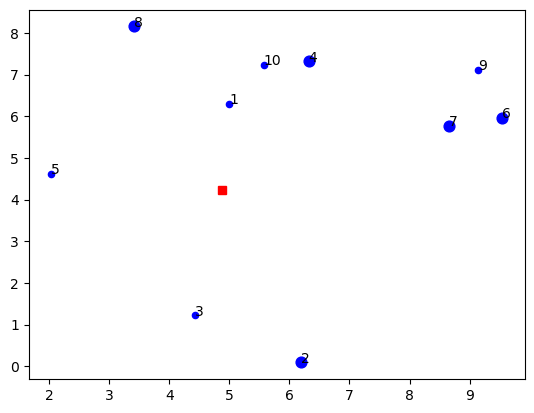

3
Generation 0: Best Fitness = 37.16606059368551
Generation 10: Best Fitness = 32.643881351131164
Generation 20: Best Fitness = 29.722241631729453
Generation 30: Best Fitness = 29.722241631729453
Generation 40: Best Fitness = 29.722241631729453
Generation 50: Best Fitness = 29.722241631729453
Generation 60: Best Fitness = 29.722241631729453
Generation 70: Best Fitness = 29.722241631729453
Generation 80: Best Fitness = 29.722241631729453
Generation 90: Best Fitness = 29.722241631729453
Generation 100: Best Fitness = 29.722241631729453
Generation 110: Best Fitness = 29.722241631729453
Generation 120: Best Fitness = 29.722241631729453
Generation 130: Best Fitness = 29.722241631729453
Generation 140: Best Fitness = 29.722241631729453
Generation 150: Best Fitness = 29.722241631729453
Generation 160: Best Fitness = 29.722241631729453
Generation 170: Best Fitness = 29.722241631729453
Generation 180: Best Fitness = 29.722241631729453
Generation 190: Best Fitness = 29.722241631729453
Generation

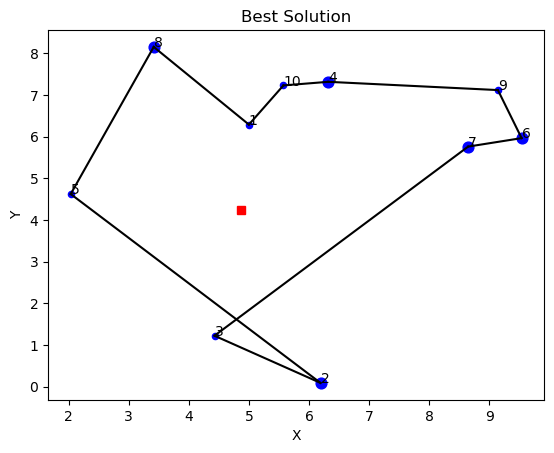

In [42]:
import random
import networkx as nx
import numpy as np
import math
import matplotlib.pyplot as plt

N = 10  # performance of algorithm
V = set(range(N + 1))
location = [(np.random.uniform(0, 10), np.random.uniform(0, 10))]
plt.plot(location[-1][0], location[-1][1], 'rs')

d = [0]
for i in V - {0}:
    location.append((np.random.uniform(0, 10), np.random.uniform(0, 10)))
    d.append(random.randint(1, 3))
    plt.scatter(location[-1][0], location[-1][1], d[-1] * 20, 'b')
    plt.text(location[-1][0], location[-1][1], i)

plt.show()


def distance(a, b):
    return math.sqrt((a[0] - b[0]) * (a[0] - b[0]) + (a[1] - b[1]) * (a[1] - b[1]))


c = [[0 if i == j
      else distance(location[i], location[j])
      for j in V] for i in V]

Capacity = 8  # capacity of truck
M = math.ceil(sum(d) / Capacity)

print(M)  # illustration of the problem


def create_individual():
    """
    Create a random individual (permutation of points excluding the depot).
    """
    individual = list(V - {0})
    random.shuffle(individual)
    return individual


def evaluate_fitness(individual):
    """
    Evaluate the fitness of an individual by calculating the total distance travelled.
    """
    fitness = 0
    current_node = 0
    for next_node in individual:
        fitness += c[current_node][next_node]
        current_node = next_node
    fitness += c[current_node][0]  # Return to depot
    return fitness


def select_parents(population):
    """
    Select parents for crossover based on their distances to the depot.
    """
    indices = list(range(len(population)))  # Indices of individuals in the population
    distances = [distance(location[0], location[population[i][0]]) for i in indices]
    probabilities = [1 / d for d in distances]
    total = sum(probabilities)
    probabilities = [p / total for p in probabilities]
    parents = random.choices(indices, weights=probabilities, k=2)
    return [population[parent] for parent in parents]


def crossover(parent1, parent2):
    """
    Perform crossover between two parents to create two offspring.
    Ordered crossover (OX) is used in this implementation.
    """
    length = len(parent1)
    start, end = sorted(random.sample(range(length), 2))
    offspring = [-1] * length

    # Copy a slice from parent 1 to offspring
    offspring[start:end] = parent1[start:end]

    # Fill in remaining positions with genes from parent 2
    pointer = end
    for gene in parent2[end:] + parent2[:end]:
        if gene not in offspring:
            offspring[pointer] = gene
            pointer = (pointer + 1) % length

    return offspring


def mutate(individual, mutation_rate):
    """
    Perform mutation on an individual.
    Swap mutation is used to swap two points in the individual.
    """
    if random.random() < mutation_rate:
        index1, index2 = random.sample(range(len(individual)), 2)
        individual[index1], individual[index2] = individual[index2], individual[index1]
    return individual


def genetic_algorithm(population_size, generations, crossover_rate, mutation_rate):
    population = [create_individual() for _ in range(population_size)]
    best_fitness = float('inf')
    best_individual = None

    for generation in range(generations):
        offspring = []
        for _ in range(population_size // 2):
            parent1, parent2 = select_parents(population)
            if random.random() < crossover_rate:
                child1 = crossover(parent1, parent2)
                child2 = crossover(parent2, parent1)
                offspring.extend([child1, child2])
            else:
                offspring.extend([parent1, parent2])

        population = offspring
        for individual in population:
            individual = mutate(individual, mutation_rate)
            fitness = evaluate_fitness(individual)
            if fitness < best_fitness:
                best_fitness = fitness
                best_individual = individual

        if generation % 10 == 0:
            print(f"Generation {generation}: Best Fitness = {best_fitness}")

    return best_individual, best_fitness


population_size = 100
generations = 1000
crossover_rate = 0.8
mutation_rate = 0.2

best_individual, best_fitness = genetic_algorithm(population_size, generations, crossover_rate, mutation_rate)
print("Best Individual:", best_individual)
print("Best Fitness:", best_fitness)

# Tracer les chemins correspondant à la meilleure solution
def plot_best_solution(solution):
    plt.figure()
    plt.plot(location[0][0], location[0][1], 'rs')
    for i in range(len(solution)):
        x_values = [location[solution[i - 1]][0], location[solution[i]][0]]
        y_values = [location[solution[i - 1]][1], location[solution[i]][1]]
        plt.plot(x_values, y_values, 'k-')
        plt.scatter(location[solution[i]][0], location[solution[i]][1], d[solution[i]] * 20, 'b')
        plt.text(location[solution[i]][0], location[solution[i]][1], solution[i])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Best Solution')
    plt.show()


plot_best_solution(best_individual)

J'essaie maintenant de rajouter un dépot : 

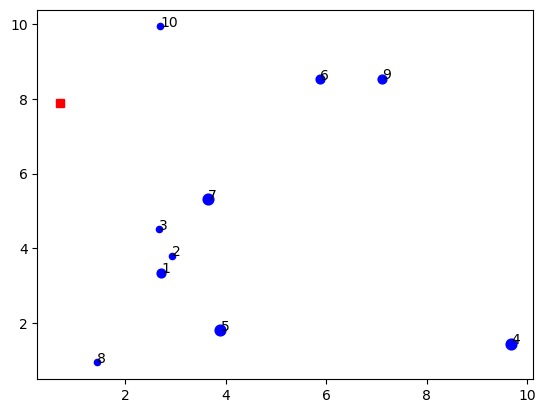

3
Generation 0: Best Fitness = 39.951458226079545
Generation 10: Best Fitness = 39.951458226079545
Generation 20: Best Fitness = 39.951458226079545
Generation 30: Best Fitness = 39.951458226079545
Generation 40: Best Fitness = 39.951458226079545
Generation 50: Best Fitness = 39.951458226079545
Generation 60: Best Fitness = 39.951458226079545
Generation 70: Best Fitness = 39.951458226079545
Generation 80: Best Fitness = 39.951458226079545
Generation 90: Best Fitness = 39.951458226079545
Generation 100: Best Fitness = 39.951458226079545
Generation 110: Best Fitness = 39.951458226079545
Generation 120: Best Fitness = 39.951458226079545
Generation 130: Best Fitness = 39.91263055374429
Generation 140: Best Fitness = 38.41863277615755
Generation 150: Best Fitness = 38.41863277615755
Generation 160: Best Fitness = 35.98642671213554
Generation 170: Best Fitness = 35.98642671213554
Generation 180: Best Fitness = 35.98642671213554
Generation 190: Best Fitness = 35.98642671213554
Generation 200: 

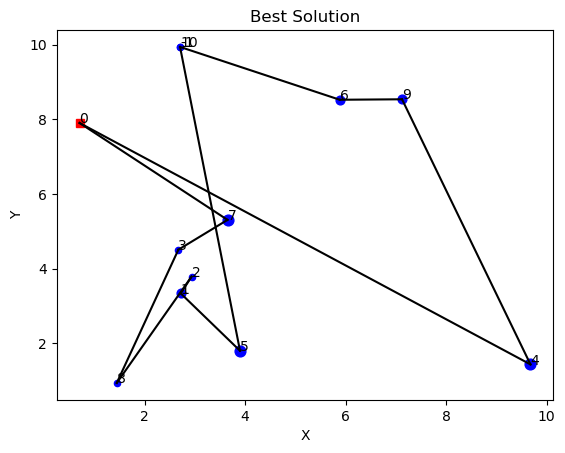

In [49]:
import random
import networkx as nx
import numpy as np
import math
import matplotlib.pyplot as plt

N = 10  # performance of algorithm
V = set(range(N + 1))
location = [(np.random.uniform(0, 10), np.random.uniform(0, 10))]
plt.plot(location[-1][0], location[-1][1], 'rs')

d = [0]
for i in V - {0}:
    location.append((np.random.uniform(0, 10), np.random.uniform(0, 10)))
    d.append(random.randint(1, 3))
    plt.scatter(location[-1][0], location[-1][1], d[-1] * 20, 'b')
    plt.text(location[-1][0], location[-1][1], i)

plt.show()


def distance(a, b):
    return math.sqrt((a[0] - b[0]) * (a[0] - b[0]) + (a[1] - b[1]) * (a[1] - b[1]))


c = [[0 if i == j
      else distance(location[i], location[j])
      for j in V] for i in V]

Capacity = 8  # capacity of truck
M = math.ceil(sum(d) / Capacity)

print(M)  # illustration of the problem


def create_individual():
    """
    Create a random individual (permutation of points excluding the depot).
    """
    individual = list(V - {0})
    random.shuffle(individual)
    individual.insert(0, 0)  # Ajouter le dépôt au début
    individual.append(0)  # Ajouter le dépôt à la fin
    return individual


def evaluate_fitness(individual):
    """
    Evaluate the fitness of an individual by calculating the total distance travelled.
    """
    fitness = 0
    for i in range(len(individual) - 1):
        current_node = individual[i]
        next_node = individual[i + 1]
        fitness += c[current_node][next_node]
    fitness += c[individual[-1]][0]  # Retour au dépôt
    return fitness


def select_parents(population):
    """
    Select parents for crossover based on their distances to the depot.
    """
    indices = list(range(len(population)))  # Indices of individuals in the population
    distances = [distance(location[0], location[population[i][0]]) for i in indices]
    weights = [dist + 1e-6 if dist != 0 else 1e-6 for dist in distances]
    parents = random.choices(indices, weights=weights, k=2)
    return [population[parent] for parent in parents]


def crossover(parent1, parent2):
    """
    Perform crossover between two parents to create two offspring.
    Ordered crossover (OX) is used in this implementation.
    """
    length = len(parent1)
    start, end = sorted(random.sample(range(length), 2))
    offspring = [-1] * length

    # Copy a slice from parent 1 to offspring
    offspring[start:end] = parent1[start:end]

    # Fill in remaining positions with genes from parent 2
    pointer = end
    for gene in parent2[end:] + parent2[:end]:
        if gene not in offspring:
            offspring[pointer] = gene
            pointer = (pointer + 1) % length

    return offspring


def mutate(individual, mutation_rate):
    """
    Perform mutation on an individual.
    Swap mutation is used to swap two points in the individual.
    """
    if random.random() < mutation_rate:
        index1, index2 = random.sample(range(len(individual)), 2)
        individual[index1], individual[index2] = individual[index2], individual[index1]
    return individual


def genetic_algorithm(population_size, generations, crossover_rate, mutation_rate):
    population = [create_individual() for _ in range(population_size)]
    best_fitness = float('inf')
    best_individual = None

    for generation in range(generations):
        offspring = []
        for _ in range(population_size // 2):
            parent1, parent2 = select_parents(population)
            if random.random() < crossover_rate:
                child1 = crossover(parent1, parent2)
                child2 = crossover(parent2, parent1)
                offspring.extend([child1, child2])
            else:
                offspring.extend([parent1, parent2])

        population = offspring
        for individual in population:
            individual = mutate(individual, mutation_rate)
            fitness = evaluate_fitness(individual)
            if fitness < best_fitness:
                best_fitness = fitness
                best_individual = individual

        if generation % 10 == 0:
            print(f"Generation {generation}: Best Fitness = {best_fitness}")

    return best_individual, best_fitness


population_size = 100
generations = 1000
crossover_rate = 0.8
mutation_rate = 0.2

best_individual, best_fitness = genetic_algorithm(population_size, generations, crossover_rate, mutation_rate)
print("Best Individual:", best_individual)
print("Best Fitness:", best_fitness)

# Tracer les chemins correspondant à la meilleure solution
def plot_best_solution(solution):
    plt.figure()
    plt.plot(location[0][0], location[0][1], 'rs')
    for i in range(len(solution)):
        x_values = [location[solution[i - 1]][0], location[solution[i]][0]]
        y_values = [location[solution[i - 1]][1], location[solution[i]][1]]
        plt.plot(x_values, y_values, 'k-')
        plt.scatter(location[solution[i]][0], location[solution[i]][1], d[solution[i]] * 20, 'b')
        plt.text(location[solution[i]][0], location[solution[i]][1], solution[i])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Best Solution')
    plt.show()


plot_best_solution(best_individual)

J'essaie de rajouter la contrainte des sous-tours :

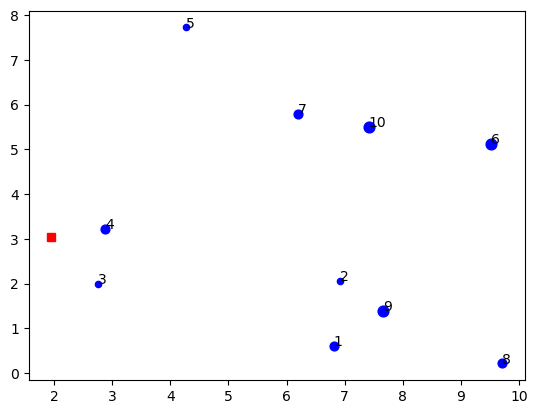

3
Generation 0: Best Fitness = 37.5659014043289
Generation 10: Best Fitness = 34.11641145981548
Generation 20: Best Fitness = 34.11641145981548
Generation 30: Best Fitness = 31.900819646648078
Generation 40: Best Fitness = 31.900819646648078
Generation 50: Best Fitness = 31.900819646648078
Generation 60: Best Fitness = 31.900819646648078
Generation 70: Best Fitness = 31.900819646648078
Generation 80: Best Fitness = 31.900819646648078
Generation 90: Best Fitness = 31.900819646648078
Generation 100: Best Fitness = 31.900819646648078
Generation 110: Best Fitness = 31.900819646648078
Generation 120: Best Fitness = 31.900819646648078
Generation 130: Best Fitness = 31.900819646648078
Generation 140: Best Fitness = 31.900819646648078
Generation 150: Best Fitness = 31.900819646648078
Generation 160: Best Fitness = 31.900819646648078
Generation 170: Best Fitness = 31.900819646648078
Generation 180: Best Fitness = 31.900819646648078
Generation 190: Best Fitness = 31.900819646648078
Generation 20

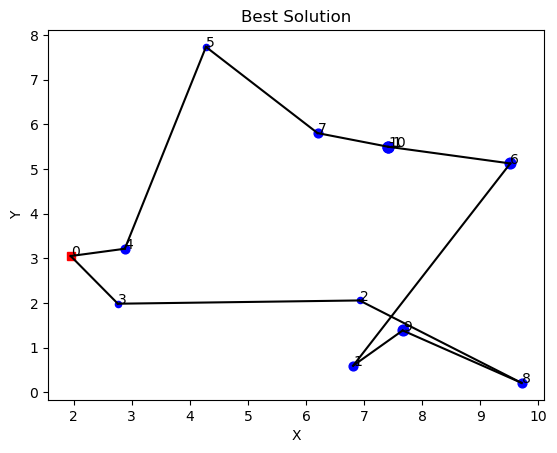

In [57]:
import random
import networkx as nx
import numpy as np
import math
import matplotlib.pyplot as plt

N = 10  # performance of algorithm
V = set(range(N + 1))
location = [(np.random.uniform(0, 10), np.random.uniform(0, 10))]
plt.plot(location[-1][0], location[-1][1], 'rs')

d = [0]
for i in V - {0}:
    location.append((np.random.uniform(0, 10), np.random.uniform(0, 10)))
    d.append(random.randint(1, 3))
    plt.scatter(location[-1][0], location[-1][1], d[-1] * 20, 'b')
    plt.text(location[-1][0], location[-1][1], i)

plt.show()


def distance(a, b):
    return math.sqrt((a[0] - b[0]) * (a[0] - b[0]) + (a[1] - b[1]) * (a[1] - b[1]))


c = [[0 if i == j
      else distance(location[i], location[j])
      for j in V] for i in V]

Capacity = 8  # capacity of truck
M = math.ceil(sum(d) / Capacity)

print(M)  # illustration of the problem


def create_individual():
    """
    Create a random individual (permutation of points excluding the depot).
    """
    individual = list(V - {0})
    random.shuffle(individual)
    individual.insert(0, 0)  # Ajouter le dépôt au début
    individual.append(0)  # Ajouter le dépôt à la fin
    return individual


def evaluate_fitness(individual):
    """
    Evaluate the fitness of an individual by calculating the total distance travelled,
    penalizing solutions with subtours.
    """
    fitness = 0
    for i in range(len(individual) - 1):
        current_node = individual[i]
        next_node = individual[i + 1]
        fitness += c[current_node][next_node]
    fitness += c[individual[-1]][0]  # Retour au dépôt

    # Check for subtours
    nodes_visited = set(individual)
    if len(nodes_visited) < len(individual):
        fitness += math.inf

    return fitness


def select_parents(population):
    """
    Select parents for crossover based on their distances to the depot.
    """
    indices = list(range(len(population)))  # Indices of individuals in the population
    distances = [distance(location[0], location[population[i][0]]) for i in indices]
    weights = [dist + 1e-6 if dist != 0 else 1e-6 for dist in distances]
    parents = random.choices(indices, weights=weights, k=2)
    return [population[parent] for parent in parents]


def crossover(parent1, parent2):
    """
    Perform crossover between two parents to create two offspring.
    Ordered crossover (OX) is used in this implementation.
    """
    length = len(parent1)
    start, end = sorted(random.sample(range(length), 2))
    offspring = [-1] * length

    # Copy a slice from parent 1 to offspring
    offspring[start:end] = parent1[start:end]

    # Fill in remaining positions with genes from parent 2
    pointer = end
    for gene in parent2[end:] + parent2[:end]:
        if gene not in offspring:
            offspring[pointer] = gene
            pointer = (pointer + 1) % length

    return offspring


def mutate(individual, mutation_rate):
    """
    Perform mutation on an individual, avoiding subtours.
    Swap mutation is used to swap two points in the individual.
    """
    if random.random() < mutation_rate:
        index1, index2 = random.sample(range(1, len(individual) - 1), 2)  # Exclude depot
        # Check if the swap creates a subtour
        if index1 < index2:
            subtour = individual[index1:index2 + 1]
        else:
            subtour = individual[index2:index1 + 1]
        if len(set(subtour)) == len(subtour):
            individual[index1], individual[index2] = individual[index2], individual[index1]
    return individual


def genetic_algorithm(population_size, generations, crossover_rate, mutation_rate):
    population = [create_individual() for _ in range(population_size)]
    best_fitness = float('inf')
    best_individual = None

    for generation in range(generations):
        offspring = []
        for _ in range(population_size // 2):
            parent1, parent2 = select_parents(population)
            if random.random() < crossover_rate:
                child1 = crossover(parent1, parent2)
                child2 = crossover(parent2, parent1)
                offspring.extend([child1, child2])
            else:
                offspring.extend([parent1, parent2])

        population = offspring
        for individual in population:
            individual = mutate(individual, mutation_rate)
            fitness = evaluate_fitness(individual)
            if fitness < best_fitness:
                best_fitness = fitness
                best_individual = individual

        if generation % 10 == 0:
            print(f"Generation {generation}: Best Fitness = {best_fitness}")

    return best_individual, best_fitness


population_size = 100
generations = 1000
crossover_rate = 0.8
mutation_rate = 0.2

best_individual, best_fitness = genetic_algorithm(population_size, generations, crossover_rate, mutation_rate)
print("Best Individual:", best_individual)
print("Best Fitness:", best_fitness)

# Tracer les chemins correspondant à la meilleure solution
def plot_best_solution(solution):
    plt.figure()
    plt.plot(location[0][0], location[0][1], 'rs')
    for i in range(len(solution)):
        x_values = [location[solution[i - 1]][0], location[solution[i]][0]]
        y_values = [location[solution[i - 1]][1], location[solution[i]][1]]
        plt.plot(x_values, y_values, 'k-')
        plt.scatter(location[solution[i]][0], location[solution[i]][1], d[solution[i]] * 20, 'b')
        plt.text(location[solution[i]][0], location[solution[i]][1], solution[i])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Best Solution')
    plt.show()


plot_best_solution(best_individual)